## Reading the Data

In [47]:
import pandas as pd

# Load the dataset
data = pd.read_csv(r"C:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\data\raw_analyst_ratings.csv")

# Display the first few rows
data.head()


,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [33]:
data['headline_length'] = data['headline'].astype(str).apply(len)

headline_stats = data['headline_length'].describe()
print(headline_stats)

count    1.407328e+06
mean     7.312051e+01
std      4.073531e+01
min      3.000000e+00
25%      4.700000e+01
50%      6.400000e+01
75%      8.700000e+01
max      5.120000e+02
Name: headline_length, dtype: float64


## Heeadline Length

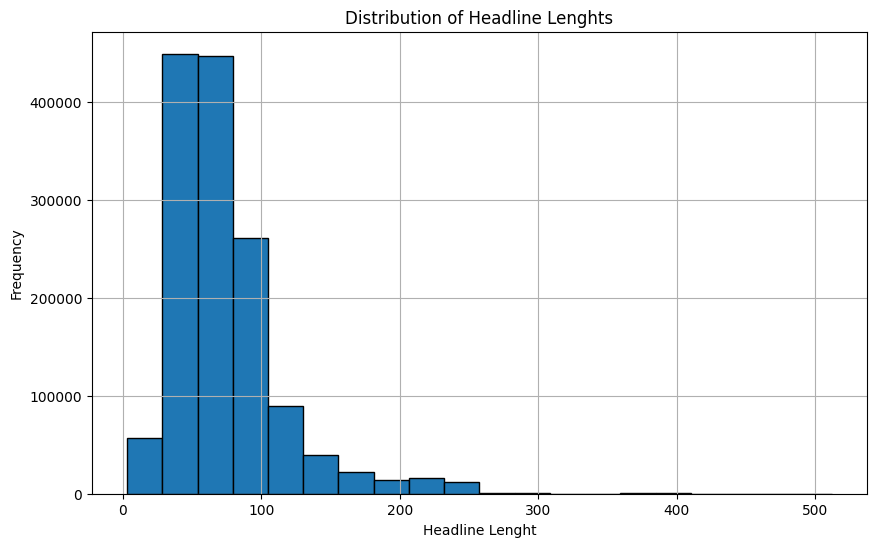

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
data['headline_length'].hist(bins=20, edgecolor= 'black')
plt.title('Distribution of Headline Lenghts')
plt.xlabel('Headline Lenght')
plt.ylabel('Frequency')
plt.show()

## Publisher Analysis

Top Publishers:
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Eddie Staley          57254
Hal Lindon            49047
ETF Professor         28489
Juan Lopez            28438
Benzinga Staff        28114
Name: count, dtype: int64


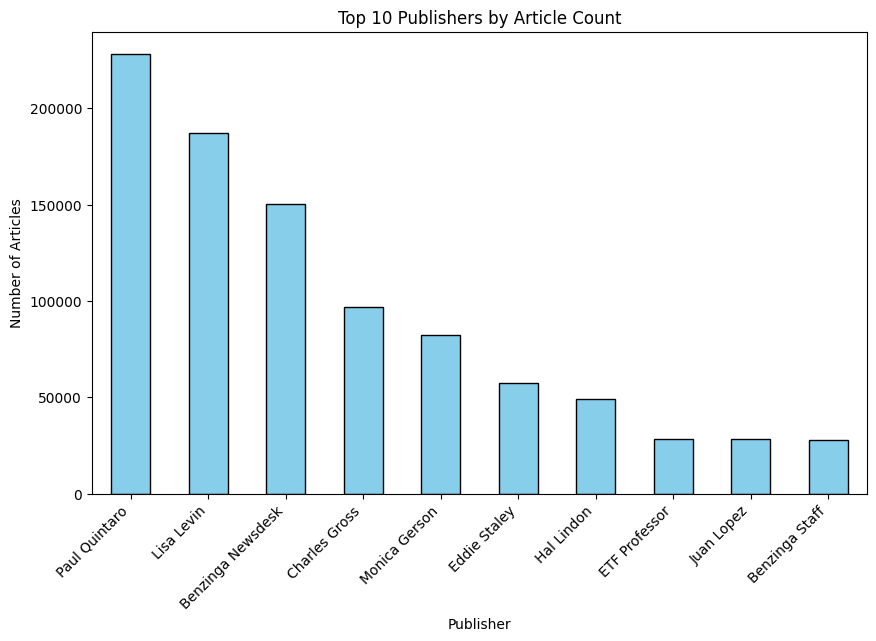

In [137]:
# Load the dataset
import sys
import os
sys.path.append(os.path.abspath('../scripts'))

from publisher_analysis import count_and_plot_publishers

# Load your dataset
data = pd.read_csv(r"C:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\data\raw_analyst_ratings.csv")

# Call the function to count and plot publishers
count_and_plot_publishers(data, column_name='publisher', top_n=10)

## Articles based on domains

In [139]:
# Load the dataset
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from email_domain_analysis import analyze_email_domains

# Load the data
file_path = r"C:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\data\raw_analyst_ratings.csv"
data = pd.read_csv(file_path)

# Analyze email domains
domain_counts = analyze_email_domains(data)

# Display the top 10 domains
print("Top 10 Domains by Number of Articles (from email addresses):")
print(domain_counts.head(10))

Top 10 Domains by Number of Articles (from email addresses):
domain
benzinga.com              7937
gmail.com                  139
andyswan.com                 5
investdiva.com               2
tothetick.com                2
eosdetroit.io                1
forextraininggroup.com       1
stockmetrix.net              1
Name: count, dtype: int64


c:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\scripts\email_domain_analysis.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  email_publishers['domain'] = email_publishers['publisher'].apply(lambda x: re.findall(r'@([\w\.-]+)', x)[0])


## Article Frequency Over Time

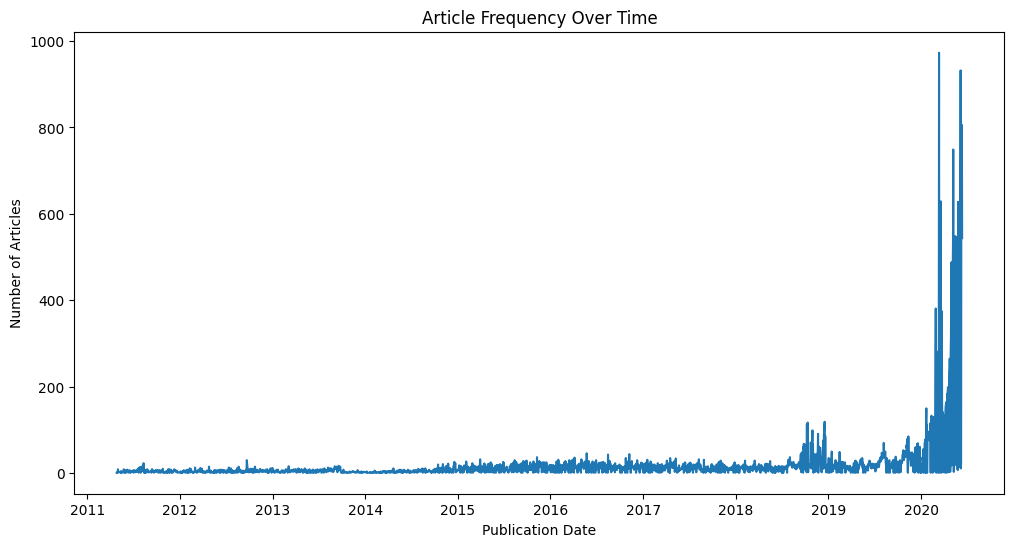

In [105]:
# Ensure the 'date' column is in datetime format
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Analyze the frequency of articles over time
date_counts = data['date'].dt.date.value_counts().sort_index()

# Plot the trend over time
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
date_counts.plot()
plt.title('Article Frequency Over Time')
plt.xlabel('Publication Date')
plt.ylabel('Number of Articles')
plt.show()

## Sentiment Analysis

In [142]:
from textblob import TextBlob

# Apply sentiment analysis on the 'headline' column using TextBlob
data['polarity'] = data['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

# Categorize the sentiment into positive, negative, or neutral based on polarity
data['sentiment_label'] = data['polarity'].apply(
    lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
)

print("Sentiment analysis complete. Here are some samples:")
print(data[['headline', 'polarity', 'sentiment_label']].head())

Sentiment analysis complete. Here are some samples:
                                            headline  polarity sentiment_label
0            Stocks That Hit 52-Week Highs On Friday       0.0         neutral
1         Stocks That Hit 52-Week Highs On Wednesday       0.0         neutral
2                      71 Biggest Movers From Friday       0.0         neutral
3       46 Stocks Moving In Friday's Mid-Day Session       0.0         neutral
4  B of A Securities Maintains Neutral on Agilent...       0.0         neutral


## Sentiment Distribution by Publisher

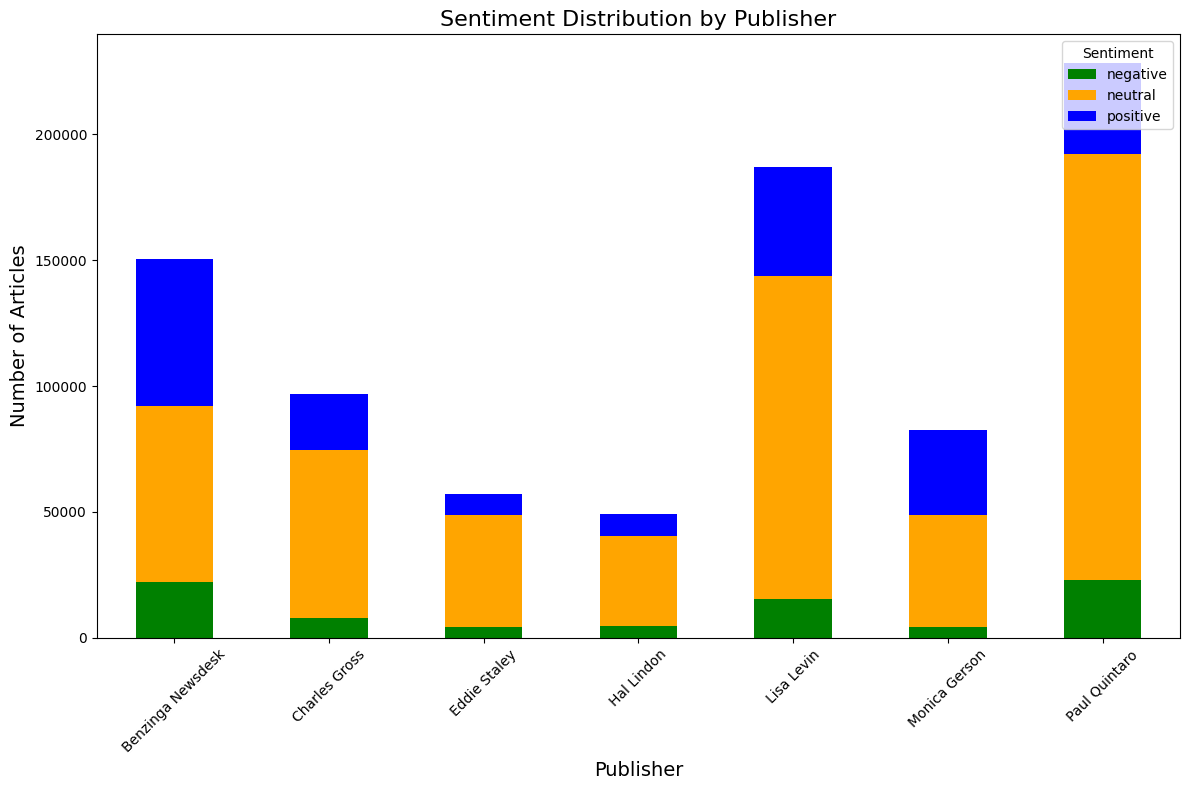

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob

n = 7

# Apply sentiment analysis if not already done
if 'polarity' not in data or 'sentiment_label' not in data:
    # Apply sentiment analysis on the 'headline' column using TextBlob
    data['polarity'] = data['headline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)

    # Categorize the sentiment into positive, negative, or neutral based on polarity
    data['sentiment_label'] = data['polarity'].apply(
        lambda score: 'positive' if score > 0 else ('negative' if score < 0 else 'neutral')
    )

# Get the top `n` publishers
top_publishers = data['publisher'].value_counts().head(n).index
filtered_df = data[data['publisher'].isin(top_publishers)]

# Group by publisher and sentiment label, then count
sentiment_by_publisher = filtered_df.groupby(['publisher', 'sentiment_label']).size().unstack(fill_value=0)

# Plot the sentiment distribution by publisher
sentiment_by_publisher.plot(kind='bar', stacked=True, figsize=(12, 8), color=['green', 'orange', 'blue'])
plt.title('Sentiment Distribution by Publisher', fontsize=16)
plt.xlabel('Publisher', fontsize=14)
plt.ylabel('Number of Articles', fontsize=14)
plt.xticks(rotation=45)
plt.legend(title='Sentiment', loc='upper right')
plt.tight_layout()
plt.show() 

In [92]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt

# Function to perform topic modeling
def perform_topic_modeling(df, num_topics=5, num_words=10, sample_size=None):
    # Subsample the data if a sample size is provided
    if sample_size:
        df = df.sample(n=sample_size, random_state=42)
    
    # Initialize CountVectorizer for text preprocessing
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
    dtm = vectorizer.fit_transform(df['headline'])  # Apply only to the 'headline' column
    vocab = vectorizer.get_feature_names_out()

    # Fit LDA model
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_model.fit(dtm)
    
    # Extract topics
    print("\nTopics discovered:")
    for idx, topic in enumerate(lda_model.components_):
        topic_words = [vocab[i] for i in topic.argsort()[-num_words:]]
        print(f"Topic #{idx + 1}: {', '.join(topic_words)}")
    
    return lda_model, dtm, vocab

# Example usage with topic modeling
data = pd.read_csv(r"C:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\data\raw_analyst_ratings.csv")

# Perform topic modeling
lda_model, dtm, vocab = perform_topic_modeling(data, num_topics=5, num_words=10, sample_size=1000)



Topics discovered:
Topic #1: downgrades, yesterday, high, set, 52, stocks, week, new, benzinga, upgrades
Topic #2: deal, company, announces, offering, year, earnings, mid, says, update, shares
Topic #3: scheduled, day, morning, pre, earnings, mid, moving, session, stocks, market
Topic #4: lows, hold, initiates, hit, shares, higher, 52, week, trading, stocks
Topic #5: pt, target, price, raises, maintains, sales, reports, eps, est, vs


## Time Series Analysis

Original 'date' column data type and sample data:
object
0    2020-06-05 10:30:54-04:00
1    2020-06-03 10:45:20-04:00
2    2020-05-26 04:30:07-04:00
3    2020-05-22 12:45:06-04:00
4    2020-05-22 11:38:59-04:00
Name: date, dtype: object

Data type of 'date' column after conversion:
datetime64[ns, UTC]

Converted 'date' column:
0         2020-06-05 14:30:54+00:00
1         2020-06-03 14:45:20+00:00
2         2020-05-26 08:30:07+00:00
3         2020-05-22 16:45:06+00:00
4         2020-05-22 15:38:59+00:00
                     ...           
1407323                         NaT
1407324                         NaT
1407325                         NaT
1407326                         NaT
1407327                         NaT
Name: date, Length: 1407328, dtype: datetime64[ns, UTC]

Data type of 'date' column after conversion:
datetime64[ns, UTC]

Sample of 'date' column after conversion:
0   2020-06-05 14:30:54+00:00
1   2020-06-03 14:45:20+00:00
2   2020-05-26 08:30:07+00:00
3   2020-05-22 16:4

C:\Users\Administrator\AppData\Local\Temp\ipykernel_6052\1922254828.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['publication_date'] = data['date'].dt.date


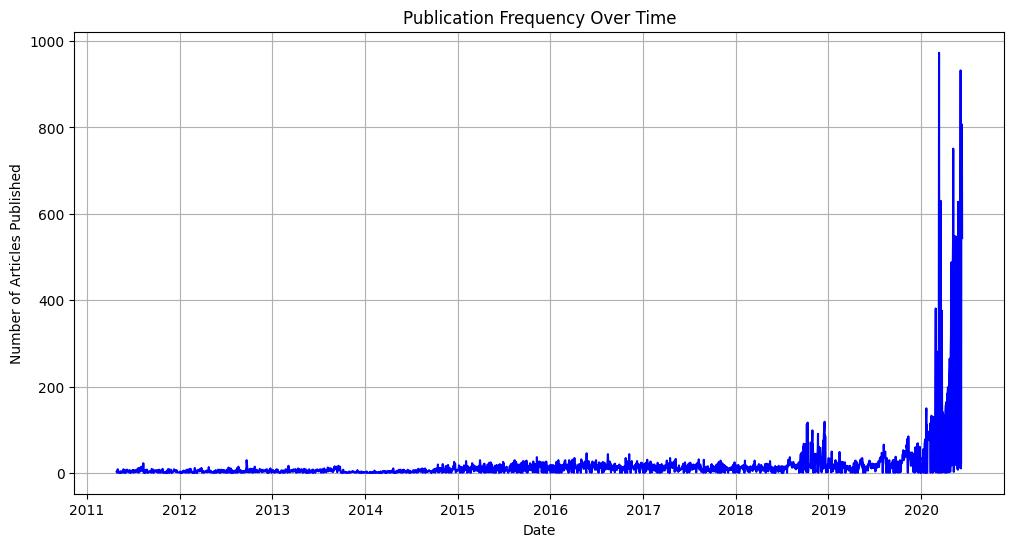

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

def analyze_publication_frequency(data):
    # Print the original data type and a few rows of the date column
    print("Original 'date' column data type and sample data:")
    print(data['date'].dtype)
    print(data['date'].head())

    # Convert the date column to datetime, handling timezone info correctly
    data['date'] = pd.to_datetime(data['date'], utc=True, errors='coerce')

    # Print the data types after conversion
    print("\nData type of 'date' column after conversion:")
    print(data['date'].dtype)

    # Print the first few rows of the date column after conversion
    print("\nConverted 'date' column:")
    print(data['date'])
    # Print the data type and some sample data to confirm the conversion
    print("\nData type of 'date' column after conversion:")
    print(data['date'].dtype)
    print("\nSample of 'date' column after conversion:")
    print(data['date'].head())

    # Check if any NaT values were created during conversion
    print("\nNumber of NaT values in 'date' column after conversion:")
    print(data['date'].isna().sum())

    # Drop any rows with NaT in the 'date' column
    data = data.dropna(subset=['date'])

    # Aggregate the data by date
    data['publication_date'] = data['date'].dt.date
    publication_counts = data['publication_date'].value_counts().sort_index()

    # Plot the time series of publication frequency as a line plot
    plt.figure(figsize=(12, 6))
    plt.plot(publication_counts, linestyle='-', marker=None, color='b')
    plt.title('Publication Frequency Over Time')
    plt.xlabel('Date')
    plt.ylabel('Number of Articles Published')
    plt.grid(True)
    plt.show()

    # Return the publication counts for further analysis if needed
    return publication_counts

data = pd.read_csv(r"C:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\data\raw_analyst_ratings.csv")
publication_counts = analyze_publication_frequency(data)

In [152]:
import sys
import os
from IPython.display import display
sys.path.append(os.path.abspath('../scripts'))
from financial_analysis import apply_technical_indicators, calculate_financial_metrics, load_stock_data, visualize_stock_data

company_names = ['AAPL','TSLA','AMZN','GOOG']

stock_data = {}

for company in company_names:
    stock_data[company] = load_stock_data(f'../data/{company}_historical_data.csv')
#stock_data = load_stock_data('../data/AAPL_historical_data.csv')
# Apply technical indicators
    stock_data_with_indicators = apply_technical_indicators(stock_data[company])
# Calculate financial metrics
    stock_data_with_metrics = calculate_financial_metrics(stock_data_with_indicators)
# Visualize the stock data with indicators
    print(f'\n{company} :\n')
    display(visualize_stock_data(stock_data_with_metrics))
    print('\n\n')

ImportError: cannot import name 'apply_technical_indicators' from 'financial_analysis' (c:\Users\Administrator\Desktop\KAIM\Financial-News-and-Stock-Price-Integration\scripts\financial_analysis.py)